https://medium.com/@marsgrins/a-bot-that-solves-semantle-in-2-to-3-guesses-ccab48b81d7c

To beat Semantle in two or three guesses:

*   Run the code below
*   Guess any random word on Semantle
*   Run possibilities(word, similarity, words10000)
*   Guess the first word in the list
*   If wrong, run possibilities2(word1, similarity1, word2, similarity2, words10000)
*   That should give you the answer





In [1]:
import gensim.downloader

In [2]:
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [3]:
vectors = gensim.downloader.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [4]:
vectors.most_similar('marshal')

[('marshals', 0.7166420221328735),
 ('marshall', 0.647331714630127),
 ('Marshal', 0.6012147068977356),
 ('Nehemiah_Flowers', 0.5268858075141907),
 ('Marshals', 0.52054762840271),
 ('marshalls', 0.4790184497833252),
 ('lawman', 0.4705892503261566),
 ('Frank_Terreri', 0.46910884976387024),
 ('Marshal_Service', 0.46136796474456787),
 ('law_enforcement', 0.4492824375629425)]

In [5]:
len(vectors['marshal']) # how many dimensions are word2vec vectors?

300

In [6]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [7]:
cosine_similarity([vectors['marshal']], [vectors['marshals']])[0][0]

0.716642

In [8]:
def cos(word1, word2):
  return cosine_similarity([vectors[word1]], [vectors[word2]])[0][0]

In [9]:
# first download this text file and put it in your directory:
# https://github.com/first20hours/google-10000-english/blob/master/google-10000-english.txt
with open('google-10000-english.txt', 'r') as file:
    words = [line.strip() for line in file]

In [10]:
words[:10]

['the', 'of', 'and', 'to', 'a', 'in', 'for', 'is', 'on', 'that']

In [11]:
def get_common_vecs(n):
  common_words=[]
  common_vecs=[]
  for word in words[:n]:
    if word in vectors:
      common_words.append(word)
      common_vecs.append(vectors[word])
  return common_words,common_vecs


In [12]:
words10000,vecs10000 = get_common_vecs(10000)
len(words10000)

9799

In [13]:
import random


In [14]:
def randword():
  return words10000[random.randint(0,len(words10000)-1)]

In [15]:
def possibilities(w, sim, wordlist): # w means word, sim means cosine similarity from Semantle
  p=[]
  sim /= 100
  for word in wordlist:
    c = cos(word,w)
    if sim - 0.00005 < c and c < sim+0.00005:
      p.append(word)
  return p

In [16]:
possibilities('truck', 4.35, words10000)


['ar',
 'strength',
 'noise',
 'def',
 'organizational',
 'constitute',
 'timeline',
 'revolutionary']

In [17]:
def possibilities2(w1, sim1, w2, sim2, wordlist): # w means word, sim means cosine similarity from Semantle
  x=possibilities(w1,sim1, wordlist)
  y=possibilities(w2,sim2, x)
  return y

In [18]:
possibilities2('truck', 4.35, 'strength', 9.33, words10000)

['revolutionary']

In [19]:
randword()

'hidden'

Less cheaty version:
You just say "best" or "not" or "solved"

In [29]:
def semantlehotcold():
  remaining_words = words10000
  colder = []
  hottest = random.choice(remaining_words)
  remaining_words.remove(hottest)
  guess = random.choice(remaining_words)
  remaining_words.remove(guess)
  print("My first guess is: " + hottest)
  print("My second guess is: " + guess)
  guesses = 2
  while 1:
    print("Is that my best guess yet?")
    user_input = input("Say 'best' or 'not' or 'solved': ")
    if user_input == 'solved':
      print("Hooray! Thanks for playing")
      return
    elif user_input == 'best':
      print("-----------------------------------------------------")
      print("Thinking...")
      colder.append(hottest)
      hottest = guess
      new = []
      for word in remaining_words:
        cosines = [cos(x, word) for x in colder]
        m = max(cosines)
        if cos(hottest, word) > m:
          new.append(word)
      if len(new) == 0:
        print("You stumped me, sorry.")
        return
      #if len(new) == 1:
      #  print("Solved! The solution is " + new)
      #  return
      remaining_words = new
      print("Possible words remaining: ",len(remaining_words))
      guess = random.choice(remaining_words)
      remaining_words.remove(guess)
      guesses += 1
      print("My guess #", guesses, " is: ", guess)
    elif user_input == 'not':
      print("-----------------------------------------------------")
      print("Thinking...")
      new = []
      for word in remaining_words:
        if cos(hottest, word) > cos(guess, word):
          new.append(word)
      remaining_words = new
      print("Possible words remaining: ",len(remaining_words))
      colder.append(guess)
      guess = random.choice(remaining_words)
      remaining_words.remove(guess)
      guesses += 1
      print("My guess #", guesses, " is: ", guess)
    else:
      print("Sorry, I don't recognize that input.")


In [24]:
semantlehotcold()

My first guess is shop
My second guess is visual
Is that my best guess yet?
Say 'best' or 'not' or 'solved': best
-----------------------------------------------------
Thinking...
Possible words remaining:  5193
My guess #  3  is  tone
Is that my best guess yet?
Say 'best' or 'not' or 'solved': best
-----------------------------------------------------
Thinking...
Possible words remaining:  1245
My guess #  4  is  commitment
Is that my best guess yet?
Say 'best' or 'not' or 'solved': best
-----------------------------------------------------
Thinking...
Possible words remaining:  343
My guess #  5  is  confidence
Is that my best guess yet?
Say 'best' or 'not' or 'solved': best
-----------------------------------------------------
Thinking...
Possible words remaining:  109
My guess #  6  is  consistently
Is that my best guess yet?
Say 'best' or 'not' or 'solved': best
-----------------------------------------------------
Thinking...
Possible words remaining:  30
My guess #  7  is  recen

Same code, but it plays against itself

In [33]:
def semantlehotcold_autoplay():
  print("-----------------------------------------------------")
  print("-----------------------------------------------------")
  remaining_words = words10000
  solution = random.choice(remaining_words)
  print("SOLUTION: ", solution)
  print("-----------------------------------------------------")
  colder = []
  hottest = random.choice(remaining_words)
  remaining_words.remove(hottest)
  guess = random.choice(remaining_words)
  remaining_words.remove(guess)
  print("My first guess is: " + hottest)
  print("My second guess is: " + guess)
  guesses = 2
  while 1:
    print("Is that my best guess yet?")
    print("Say 'best' or 'not' or 'solved': ")

    if guess == solution:
      user_input = 'solved'
    elif cos(guess, solution) > cos (hottest, solution):
      user_input = 'best'
    else:
      user_input = 'not'
    print(">>>", user_input)

    if user_input == 'solved':
      print("Hooray! Thanks for playing")
      return guesses
    elif user_input == 'best':
      print("-----------------------------------------------------")
      print("Thinking...")
      colder.append(hottest)
      hottest = guess
      new = []
      for word in remaining_words:
        cosines = [cos(x, word) for x in colder]
        m = max(cosines)
        if cos(hottest, word) > m:
          new.append(word)
      if len(new) == 0:
        print("You stumped me, sorry.")
        return
      #if len(new) == 1:
      #  print("Solved! The solution is " + new)
      #  return
      remaining_words = new
      print("Possible words remaining: ",len(remaining_words))
      guess = random.choice(remaining_words)
      remaining_words.remove(guess)
      guesses += 1
      print("My guess #", guesses, " is: ", guess)
    elif user_input == 'not':
      print("-----------------------------------------------------")
      print("Thinking...")
      new = []
      for word in remaining_words:
        if cos(hottest, word) > cos(guess, word):
          new.append(word)
      remaining_words = new
      print("Possible words remaining: ",len(remaining_words))
      colder.append(guess)
      guess = random.choice(remaining_words)
      remaining_words.remove(guess)
      guesses += 1
      print("My guess #", guesses, " is: ", guess)
    else:
      print("Sorry, I don't recognize that input.")

In [34]:
semantlehotcold_autoplay()

SOLUTION:  mileage
-----------------------------------------------------
My first guess is: computational
My second guess is: au
Is that my best guess yet?
Say 'best' or 'not' or 'solved': 
>>> not
-----------------------------------------------------
Thinking...
Possible words remaining:  4977
My guess # 3  is:  dictionary
Is that my best guess yet?
Say 'best' or 'not' or 'solved': 
>>> not
-----------------------------------------------------
Thinking...
Possible words remaining:  2960
My guess # 4  is:  limits
Is that my best guess yet?
Say 'best' or 'not' or 'solved': 
>>> best
-----------------------------------------------------
Thinking...
Possible words remaining:  1098
My guess # 5  is:  managers
Is that my best guess yet?
Say 'best' or 'not' or 'solved': 
>>> not
-----------------------------------------------------
Thinking...
Possible words remaining:  850
My guess # 6  is:  raises
Is that my best guess yet?
Say 'best' or 'not' or 'solved': 
>>> not
------------------------

23

In [35]:
h = [semantlehotcold_autoplay() for _ in range(20)]

SOLUTION:  details
-----------------------------------------------------
My first guess is: primary
My second guess is: quiz
Is that my best guess yet?
Say 'best' or 'not' or 'solved': 
>>> best
-----------------------------------------------------
Thinking...
Possible words remaining:  5643
My guess # 3  is:  careers
Is that my best guess yet?
Say 'best' or 'not' or 'solved': 
>>> not
-----------------------------------------------------
Thinking...
Possible words remaining:  4252
My guess # 4  is:  sally
Is that my best guess yet?
Say 'best' or 'not' or 'solved': 
>>> not
-----------------------------------------------------
Thinking...
Possible words remaining:  2228
My guess # 5  is:  deposit
Is that my best guess yet?
Say 'best' or 'not' or 'solved': 
>>> not
-----------------------------------------------------
Thinking...
Possible words remaining:  1765
My guess # 6  is:  complimentary
Is that my best guess yet?
Say 'best' or 'not' or 'solved': 
>>> not
-------------------------

In [37]:
np.mean(h)

19.2

(array([ 2., 10.,  4.,  1.,  2.,  0.,  0.,  0.,  0.,  1.]),
 array([ 7., 12., 17., 22., 27., 32., 37., 42., 47., 52., 57.]),
 <BarContainer object of 10 artists>)

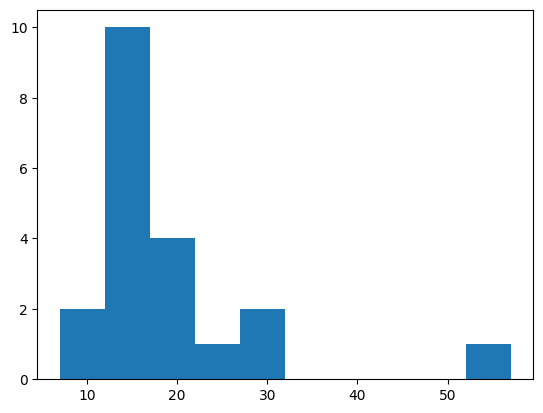

In [40]:
import matplotlib.pyplot as plt

plt.hist(h)

In [39]:
np.std(h)

10.395191195932858

In [41]:
min(h),max(h)

(7, 57)

In [42]:
h

[16, 15, 29, 15, 26, 21, 16, 7, 17, 57, 10, 14, 18, 13, 14, 13, 16, 20, 31, 16]